# Assignment 2 - Continuous Peaks Problem

Dongbo Zhang

dzhang48@gatech.edu

In [ ]:
!pip install mlrose

In [ ]:
!pip install mlrose_hiive

In [1]:
#import mlrose
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
n_experiments = 5
max_iters = 10000
max_attmp = 100
RANDOM_SEED_LIST = [7, 161117, 15, 123, 7641, 1467, 9052, 1834, 3149, 99]

### Continuous Peaks Generator

In [2]:
from mlrose_hiive.generators.continuous_peaks_generator import ContinuousPeaksGenerator
problem = ContinuousPeaksGenerator.generate(seed=RANDOM_SEED_LIST[0],
                                            size=50, 
                                            t_pct=0.1)
output_dir = 'output_cp'

### Randomized Hill Climbing

In [ ]:
#from mlrose_hiive.runners.rhc_runner import RHCRunner
experiment_res_rhc = pd.DataFrame()
restarts = [3] + list(range(5, 31, 5))
interations = 2 ** np.arange(13)

for i, seed in enumerate(RANDOM_SEED_LIST):
    rhc_df = {'exp':[], 'Iteration':[], 'Fitness':[], 'Time':[], 'Restarts':[]}
    for j, r in enumerate(restarts):
        for iter_ in interations:
            start_time = time.process_time()
            best_state_rhc, best_fitness_rhc, cur = mlrose_hiive.random_hill_climb(problem,
                                                                max_attempts=max_attmp,
                                                                restarts=r,
                                                                max_iters = int(iter_),
                                                                curve=False,
                                                                random_state=seed)
            elapse = time.process_time() - start_time
            #print ("restart=", r, "seed=", seed, "iter_=", iter_, best_fitness_rhc, elapse)
            rhc_df['exp'].append(i)
            rhc_df['Iteration'].append(iter_)
            rhc_df['Fitness'].append(best_fitness_rhc)
            rhc_df['Time'].append(elapse)
            rhc_df['Restarts'].append(r)
    pd.DataFrame(rhc_df).to_csv('{}/rhc_{}.csv'.format(output_dir,i), index=False)   

### Simulated Annealing

In [ ]:
temperature = [1, 10, 50, 100, 500, 1000, 5000]
schedule = [mlrose_hiive.GeomDecay(init_temp=t) for t in temperature] + \
           [mlrose_hiive.ExpDecay(init_temp=t) for t in temperature] 
interations = 2 ** np.arange(13)
for i, seed in enumerate(RANDOM_SEED_LIST):
    sa_df = {'exp':[], 'Iteration':[], 'Fitness':[], 'Time':[], 'Schedule':[], 'Temperature':[]}
    for j, s in enumerate(schedule):
        for iter_ in interations:
            start_time = time.process_time()
            best_state_sa, best_fitness_sa, curve_sa = mlrose_hiive.simulated_annealing(problem, 
                                                       schedule = s,
                                                       max_attempts = max_attmp, 
                                                       max_iters = int(iter_),
                                                       init_state = None, 
                                                       curve=False,
                                                       random_state=seed)
            elapse = time.process_time() - start_time
            schedule_name = 'geometric' if j < len(schedule)/2 else 'exponential'
            sa_df['exp'].append(i)
            sa_df['Iteration'].append(iter_)
            sa_df['Fitness'].append(best_fitness_sa)
            sa_df['Time'].append(elapse)
            sa_df['Schedule'].append(schedule_name)
            sa_df['Temperature'].append(temperature[j%len(temperature)])
    pd.DataFrame(sa_df).to_csv('{}/sa_{}.csv'.format(output_dir,i), index=False)   

In [ ]:
from mlrose_hiive.runners.sa_runner import SARunner
experiment_res_sa = pd.DataFrame()
for i, seed in enumerate(RANDOM_SEED_LIST):
    experiment_name = 'experiment_sa_{}'.format(i)
    sa = SARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='output_cp',
                  seed=seed,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=5000,
                  temperature_list=[1, 10, 50, 100, 500, 1000,],
                  decay_list = [mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

    df_run_stats, df_run_curves = sa.run() 
    df_run_stats['exp'] = i
    experiment_res_sa = pd.concat([experiment_res_sa, df_run_stats], axis=0)

### Genetic Algorithm

In [ ]:
pop_size = [100, 200, 500]
mutation_rates = [0.01, 0.1, 0.3]
interations = 2 ** np.arange(13)
for i, seed in enumerate(RANDOM_SEED_LIST):
    ga_df = {'exp':[], 'Iteration':[], 'Fitness':[], 'Time':[], 'Population Size':[], 'Mutation Rate':[]}
    for pop_s in pop_size:
        print (i, 'pop_size=', pop_s)
        for rate in mutation_rates:
            for iter_ in interations:
                start_time = time.process_time()
                best_state_ga, best_fitness_ga, curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=pop_s, 
                                   mutation_prob=rate, max_attempts=max_attmp, random_state=seed,
                                   max_iters=int(iter_), 
                                   curve=False)
                elapse = time.process_time() - start_time
                ga_df['exp'].append(i)
                ga_df['Iteration'].append(iter_)
                ga_df['Fitness'].append(best_fitness_ga)
                ga_df['Time'].append(elapse)
                ga_df['Population Size'].append(pop_s)
                ga_df['Mutation Rate'].append(rate)
    pd.DataFrame(ga_df).to_csv('{}/ga_{}.csv'.format(output_dir,i), index=False)

0 pop_size= 100
0 pop_size= 200
0 pop_size= 500
1 pop_size= 100
1 pop_size= 200
1 pop_size= 500
2 pop_size= 100
2 pop_size= 200
2 pop_size= 500
3 pop_size= 100
3 pop_size= 200
3 pop_size= 500
4 pop_size= 100
4 pop_size= 200
4 pop_size= 500
5 pop_size= 100
5 pop_size= 200
5 pop_size= 500
6 pop_size= 100
6 pop_size= 200
6 pop_size= 500
7 pop_size= 100
7 pop_size= 200
7 pop_size= 500
8 pop_size= 100
8 pop_size= 200
8 pop_size= 500


In [ ]:
from mlrose_hiive.runners.ga_runner import GARunner
experiment_res_ga = pd.DataFrame()
for i, seed in enumerate(RANDOM_SEED_LIST):
    experiment_name = 'experiment_ga_{}'.format(i)
    ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory="output_cp",
                  seed=seed,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=5000,
                  population_sizes=[100, 200, 500],
                  mutation_rates=[0.01, 0.1, 0.3])
                  
    df_run_stats, df_run_curves = ga.run() 
    df_run_stats['exp'] = i
    experiment_res_ga = pd.concat([experiment_res_ga, df_run_stats], axis=0)

### Experiments on MIMIC

In [ ]:
pop_size = [100, 200, 500]
keep_pct = [0.1, 0.2, 0.5]
interations = 2 ** np.arange(13)
for i, seed in enumerate(RANDOM_SEED_LIST):
    mimic_df = {'exp':[], 'Iteration':[], 'Fitness':[], 'Time':[], 'Population Size':[], 'Mutation Rate':[]}
    for pop_s in pop_size:
        print (i, "pop_size=", pop_s)
        for rate in keep_pct:
            for iter_ in interations:
                start_time = time.process_time()
                best_state_mimic, best_fitness_mimic, curve_mimic = mlrose_hiive.mimic(problem, pop_size=pop_s, 
                                                     keep_pct=rate, 
                                                     max_attempts=max_attmp, 
                                                     max_iters=int(iter_), 
                                                     curve=False, 
                                                     random_state=seed)
                elapse = time.process_time() - start_time
                mimic_df['exp'].append(i)
                mimic_df['Iteration'].append(iter_)
                mimic_df['Fitness'].append(best_fitness_mimic)
                mimic_df['Time'].append(elapse)
                mimic_df['Population Size'].append(pop_s)
                mimic_df['Keep Pct'].append(rate)
    pd.DataFrame(mimic_df).to_csv('{}/mimic_{}.csv'.format(output_dir,i), index=False)

### Read Results

In [187]:
def read_res(model_name, exp_name, output_dir, length):
    res = pd.DataFrame()
    for i in range(length):
        #file = '{output_dir}/{exp_name}_{i}/{model}__{exp_name}_{i}__run_stats_df.csv'.format(output_dir=output_dir, 
        #                                                                       exp_name=exp_name, model=model_name,
        #                                                                               i=i)
        file = '{output_dir}/{model}_{i}.csv'.format(output_dir=output_dir, 
                                                                               exp_name=exp_name, model=model_name,
                                                                                       i=i)
        tmp = pd.read_csv(file)
        res = pd.concat([res, tmp], axis=0)
    return res

output_dir = 'output_cp'
sa_res_df = read_res('sa','experiment_sa',output_dir,len(RANDOM_SEED_LIST))
sa_res_df_avg = sa_res_df.groupby(['Iteration','Schedule','Temperature'])[['Fitness','Time']].mean().reset_index()
ga_res_df = read_res('ga','experiment_ga',output_dir,len(RANDOM_SEED_LIST))
ga_res_df_avg = ga_res_df.groupby(['Iteration','Population Size','Mutation Rate'])[['Fitness','Time']].mean().reset_index()
rhc_res_df = read_res('rhc','experiment_rhc',output_dir,len(RANDOM_SEED_LIST))
rhc_res_df_avg = rhc_res_df.groupby(['Iteration','Restarts'])[['Fitness','Time']].mean().reset_index()
mimic_res_df = read_res('mimic','experiment_mimic','output_cp',len(RANDOM_SEED_LIST))
mimic_res_df_avg = mimic_res_df.groupby(['Iteration','Population Size','Keep Pct'])[['Fitness','Time']].mean().reset_index()




### Analysis on RHC

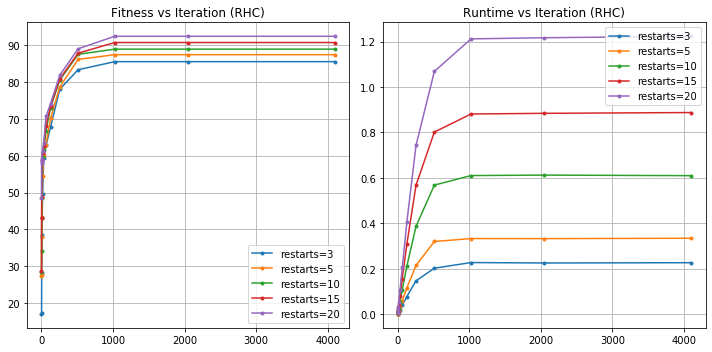

In [188]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
for r in rhc_res_df_avg['Restarts'].unique()[:-2]:
    ax[0].plot(rhc_res_df_avg[(rhc_res_df_avg['Restarts']==r)]['Iteration'],
                rhc_res_df_avg[(rhc_res_df_avg['Restarts']==r)]['Fitness'],
                label="restarts={}".format(r), marker=".")
    ax[1].plot(rhc_res_df_avg[(rhc_res_df_avg['Restarts']==r)]['Iteration'],
                rhc_res_df_avg[(rhc_res_df_avg['Restarts']==r)]['Time'],
                label="restarts={}".format(r), marker=".")
ax[0].set_title("Fitness vs Iteration (RHC)")
ax[1].set_title("Runtime vs Iteration (RHC)")
ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',
#            borderaxespad=0, frameon=False)
plt.tight_layout()
plt.savefig('cp_rhc_param.png',dpi=200)
plt.show()

### Analysis on SA

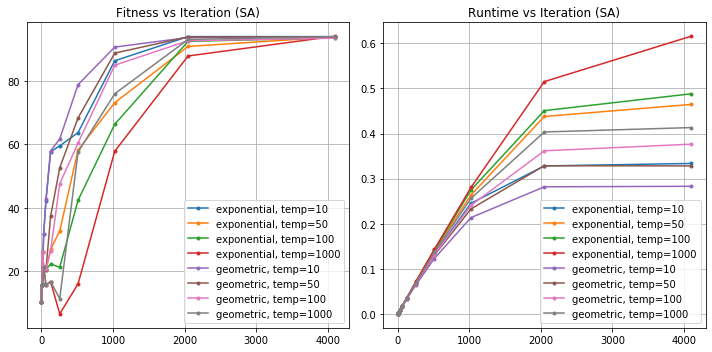

In [190]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
for schedule in sa_res_df_avg['Schedule'].unique():
    for t in [10, 50, 100, 1000]:
        ax[0].plot(sa_res_df_avg[(sa_res_df_avg['Schedule']==schedule)&(sa_res_df_avg['Temperature']==t)]['Iteration'],
                sa_res_df_avg[(sa_res_df_avg['Schedule']==schedule)&(sa_res_df_avg['Temperature']==t)]['Fitness'],
                label="{}, temp={}".format(schedule, t), marker=".")
        ax[1].plot(sa_res_df_avg[(sa_res_df_avg['Schedule']==schedule)&(sa_res_df_avg['Temperature']==t)]['Iteration'],
                sa_res_df_avg[(sa_res_df_avg['Schedule']==schedule)&(sa_res_df_avg['Temperature']==t)]['Time'],
                label="{}, temp={}".format(schedule, t), marker=".")
        
ax[0].set_title("Fitness vs Iteration (SA)")
ax[1].set_title("Runtime vs Iteration (SA)")
ax[0].legend()
ax[1].legend()
#ax[2].legend()
ax[0].grid(True)
ax[1].grid(True)
#ax[2].grid(True)
        
plt.tight_layout()
plt.savefig('cp_sa_param.png',dpi=200)
plt.show()

### Analysis on GA

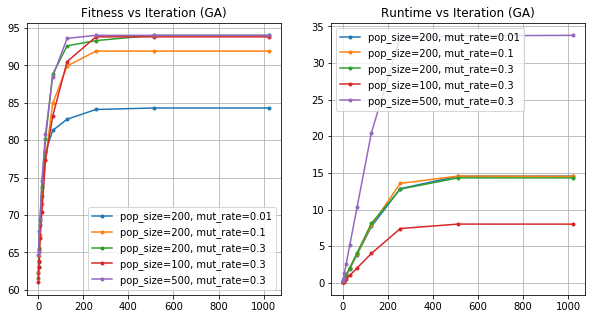

In [191]:
ga_res_df = read_res('ga','experiment_ga','output_cp',len(RANDOM_SEED_LIST))
ga_res_df_avg = ga_res_df.groupby(['Iteration','Population Size','Mutation Rate'])[['Fitness','Time']].mean().reset_index()
ga_res_df_avg = ga_res_df_avg[ga_res_df_avg.Iteration <= 2**10]
fig, ax = plt.subplots(1,2, figsize=(10,5))
ga_params = [(200, 0.01),(200,0.1), (200, 0.3), (100, 0.3), (500, 0.3)]
for pop_size, rate in ga_params:
    ax[0].plot(ga_res_df_avg[(ga_res_df_avg['Population Size']==pop_size)&(ga_res_df_avg['Mutation Rate']==rate)]['Iteration'],
                ga_res_df_avg[(ga_res_df_avg['Population Size']==pop_size)&(ga_res_df_avg['Mutation Rate']==rate)]['Fitness'],
                label="pop_size={}, mut_rate={}".format(pop_size, rate), marker=".")

    ax[1].plot(ga_res_df_avg[(ga_res_df_avg['Population Size']==pop_size)&(ga_res_df_avg['Mutation Rate']==rate)]['Iteration'],
                ga_res_df_avg[(ga_res_df_avg['Population Size']==pop_size)&(ga_res_df_avg['Mutation Rate']==rate)]['Time'],
                label="pop_size={}, mut_rate={}".format(pop_size, rate), marker=".")
    
ax[0].set_title("Fitness vs Iteration (GA)")
ax[1].set_title("Runtime vs Iteration (GA)")
ax[0].legend()
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)
plt.savefig('cp_ga_param.png',dpi=200)
plt.show()

### Analysis on MIMIC

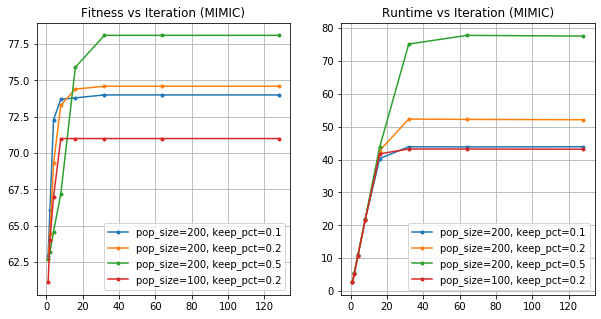

In [192]:
mimic_res_df = read_res('mimic','experiment_mimic','output_cp',len(RANDOM_SEED_LIST))
mimic_res_df_avg = mimic_res_df.groupby(['Iteration','Population Size','Keep Pct'])[['Fitness','Time']].mean().reset_index()

mimic_params = [(200, 0.1),(200,0.2), (200, 0.5), (100, 0.2)]
mimic_res_df_avg = mimic_res_df_avg[mimic_res_df_avg.Iteration <= 2**7]
fig, ax = plt.subplots(1,2, figsize=(10,5))
for pop_size, rate in mimic_params:
    ax[0].plot(mimic_res_df_avg[(mimic_res_df_avg['Population Size']==pop_size)&(mimic_res_df_avg['Keep Pct']==rate)]['Iteration'],
                mimic_res_df_avg[(mimic_res_df_avg['Population Size']==pop_size)&(mimic_res_df_avg['Keep Pct']==rate)]['Fitness'],
                label="pop_size={}, keep_pct={}".format(pop_size, rate), marker=".")

    ax[1].plot(mimic_res_df_avg[(mimic_res_df_avg['Population Size']==pop_size)&(mimic_res_df_avg['Keep Pct']==rate)]['Iteration'],
                mimic_res_df_avg[(mimic_res_df_avg['Population Size']==pop_size)&(mimic_res_df_avg['Keep Pct']==rate)]['Time'],
                label="pop_size={}, keep_pct={}".format(pop_size, rate), marker=".")
    
ax[0].set_title("Fitness vs Iteration (MIMIC)")
ax[1].set_title("Runtime vs Iteration (MIMIC)")
ax[0].legend()
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)

plt.savefig('cp_mimic_param.png',dpi=200)
plt.show()

### Comparison

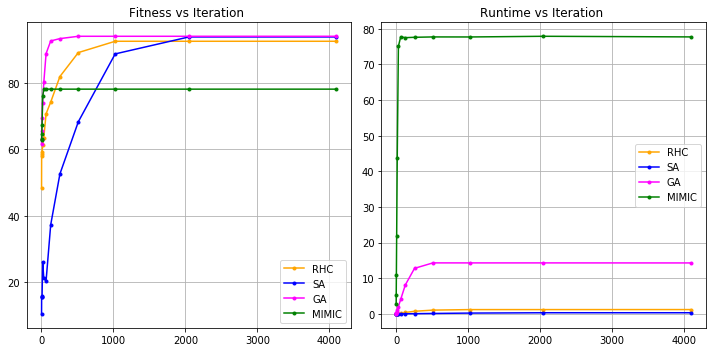

In [193]:
# CP Comparison
sa_res_df_avg = sa_res_df.groupby(['Iteration','Schedule','Temperature'])[['Fitness','Time']].mean().reset_index()
ga_res_df_avg = ga_res_df.groupby(['Iteration','Population Size','Mutation Rate'])[['Fitness','Time']].mean().reset_index()
rhc_res_df_avg = rhc_res_df.groupby(['Iteration','Restarts'])[['Fitness','Time']].mean().reset_index()
mimic_res_df_avg = mimic_res_df.groupby(['Iteration','Population Size','Keep Pct'])[['Fitness','Time']].mean().reset_index()




best_rhc = rhc_res_df_avg[rhc_res_df_avg['Restarts']==20].reset_index(drop=False)
best_sa = sa_res_df_avg[(sa_res_df_avg['Schedule']=='geometric')&
                       (sa_res_df_avg['Temperature']==50)].reset_index(drop=False)
best_ga = ga_res_df_avg[(ga_res_df_avg['Population Size']==200)&
                       (ga_res_df_avg['Mutation Rate']==0.3)].reset_index(drop=False)
best_mimic = mimic_res_df_avg[(mimic_res_df_avg['Population Size']==200)&
                       (mimic_res_df_avg['Keep Pct']==0.5)].reset_index(drop=False)



comparison = pd.merge(best_rhc, best_sa, on='Iteration', suffixes=('_rhc','_sa'))
comparison = pd.merge(comparison, best_ga, on='Iteration')
comparison = comparison.rename(columns={'Fitness':'Fitness_ga', 'Time':'Time_ga'})
comparison = pd.merge(comparison, best_mimic, on='Iteration')
comparison = comparison.rename(columns={'Fitness':'Fitness_mimic', 'Time':'Time_mimic'})
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(comparison['Iteration'], comparison['Fitness_rhc'], label="RHC", marker=".", color='orange')
ax[0].plot(comparison['Iteration'], comparison['Fitness_sa'], label="SA", marker=".", color='blue')
ax[0].plot(comparison['Iteration'], comparison['Fitness_ga'], label="GA", marker=".", color='magenta')
ax[0].plot(comparison['Iteration'], comparison['Fitness_mimic'], label="MIMIC", marker=".", color='green')
ax[1].plot(comparison['Iteration'], comparison['Time_rhc'], label="RHC", marker=".", color='orange')
ax[1].plot(comparison['Iteration'], comparison['Time_sa'], label="SA", marker=".", color='blue')
ax[1].plot(comparison['Iteration'], comparison['Time_ga'], label="GA", marker=".", color='magenta')
ax[1].plot(comparison['Iteration'], comparison['Time_mimic'], label="MIMIC", marker=".", color='green')


ax[0].set_title("Fitness vs Iteration ")
ax[1].set_title("Runtime vs Iteration ")
ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',
#            borderaxespad=0, frameon=False)
plt.tight_layout()
plt.savefig('cp_comparison.png',dpi=200)
plt.show()

### Run comparison

In [198]:
from mlrose_hiive.runners.sa_runner import SARunner
from mlrose_hiive.runners.ga_runner import GARunner
from mlrose_hiive.runners.mimic_runner import MIMICRunner
from mlrose_hiive.generators.continuous_peaks_generator import ContinuousPeaksGenerator
for num in range(10, 60, 10):
    problem = ContinuousPeaksGenerator.generate(seed=RANDOM_SEED_LIST[0],
                                            size=num, 
                                            t_pct=0.1)


    print (num)
    output_dir = 'cp_compare_new_{}'.format(num)
    experiment_res_sa = pd.DataFrame()
    for i, seed in enumerate(RANDOM_SEED_LIST):
        experiment_name = 'experiment_sa_{}'.format(i)
        sa = SARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory=output_dir,
                  seed=seed,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=max_attmp,
                  temperature_list=[1000],
                  decay_list = [mlrose_hiive.ExpDecay])

        df_run_stats, df_run_curves = sa.run() 
        
        
        rhc_df = {'exp':[], 'Iteration':[], 'Fitness':[], 'Time':[]}
        interations=2 ** np.arange(13)
        for iter_ in interations:
            start_time = time.process_time()
            best_state_rhc, best_fitness_rhc, cur = mlrose_hiive.random_hill_climb(problem,
                                                                max_attempts=max_attmp,
                                                                restarts=15,
                                                                max_iters = int(iter_),
                                                                curve=False,
                                                                random_state=seed)
            elapse = time.process_time() - start_time
            print ( "seed=", seed, "iter_=", iter_, best_fitness_rhc, elapse)
            rhc_df['exp'].append(i)
            rhc_df['Iteration'].append(iter_)
            rhc_df['Fitness'].append(best_fitness_rhc)
            rhc_df['Time'].append(elapse)
        pd.DataFrame(rhc_df).to_csv('{}/rhc_{}.csv'.format(output_dir,i), index=False)
        
        experiment_name = 'experiment_ga_{}'.format(i)
        ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory=output_dir,
                  seed=seed,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=5000,
                  population_sizes=[200],
                  mutation_rates=[0.3])
                  
        df_run_stats, df_run_curves = ga.run() 
        
        
        experiment_name = 'experiment_mimic_{}'.format(i)
        mimic = MIMICRunner(problem=problem,
                      experiment_name=experiment_name,
                      output_directory=output_dir,
                      seed=seed,
                      iteration_list=2 ** np.arange(13),
                      max_attempts=max_attmp/10,
                      population_sizes = [200],
                      keep_percent_list=[0.5])
                  
        df_run_stats, df_run_curves = mimic.run() 

,Iteration,Schedule,Temperature,Fitness,Time
173,4096,exponential,1000,94.0,0.615461
180,4096,geometric,1000,93.9,0.413220
155,2048,exponential,10,93.9,0.328320
172,4096,exponential,500,93.9,0.555148
169,4096,exponential,10,93.9,0.333743
...,...,...,...,...,...
0,1,exponential,1,10.5,0.000497
117,256,exponential,1000,6.6,0.072581
116,256,exponential,500,6.2,0.074060
125,256,geometric,5000,6.1,0.068643


### Read Results

In [207]:
### CP
def read_res(model_name, exp_name, output_dir, length):
    res = pd.DataFrame()
    for i in range(length):
        file = '{output_dir}/{exp_name}_{i}/{model}__{exp_name}_{i}__run_stats_df.csv'.format(output_dir=output_dir, 
                                                                               exp_name=exp_name, model=model_name,
                                                                                       i=i)
        tmp = pd.read_csv(file)
        tmp['exp'] = i
        tmp['num_eval'] = tmp['Iteration'].tolist()[tmp['Fitness'].tolist().index(tmp['Fitness'].max())]
        tmp['Time'] = tmp['Time'].tolist()[tmp['Fitness'].tolist().index(tmp['Fitness'].max())]
        res = pd.concat([res, tmp], axis=0)
    return res

def read_res_1(model_name, exp_name, output_dir, length):
    res = pd.DataFrame()
    for i in range(length):                                                                            
        file = '{output_dir}/{model}_{i}.csv'.format(output_dir=output_dir, 
                                                                               exp_name=exp_name, model=model_name,
                                                                                       i=i)
        tmp = pd.read_csv(file)
        tmp['exp'] = i
        tmp['num_eval'] = tmp['Iteration'].tolist()[tmp['Fitness'].tolist().index(tmp['Fitness'].max())]
        res = pd.concat([res, tmp], axis=0)
    return res

compare_all = pd.DataFrame()
for num in range(10, 60, 10):
    output_dir = 'cp_compare_new_{}'.format(num)

    sa_res_df = read_res('sa','experiment_sa',output_dir, len(RANDOM_SEED_LIST))
    rhc_res_df = read_res_1('rhc','experiment_rhc',output_dir,len(RANDOM_SEED_LIST))
    ga_res_df = read_res('ga','experiment_ga',output_dir,len(RANDOM_SEED_LIST))
    mimic_res_df = read_res('mimic','experiment_mimic',output_dir,len(RANDOM_SEED_LIST))
    sa_res_df['algo'] = 'sa'
    rhc_res_df['algo'] = 'rhc'
    ga_res_df['algo'] = 'ga'
    mimic_res_df['algo'] = 'mimic'
    sa_res_df_best = sa_res_df.groupby(['algo','exp'])[['Fitness','Time','num_eval']].max().reset_index().groupby('algo').mean().reset_index()
    rhc_res_df_best = rhc_res_df.groupby(['algo','exp'])[['Fitness','Time','num_eval']].max().reset_index().groupby('algo').mean().reset_index()
    ga_res_df_best = ga_res_df.groupby(['algo','exp'])[['Fitness','Time','num_eval']].max().reset_index().groupby('algo').mean().reset_index()
    mimic_res_df_best = mimic_res_df.groupby(['algo','exp'])[['Fitness','Time','num_eval']].max().reset_index().groupby('algo').mean().reset_index()
    
    
    compare = pd.concat([sa_res_df_best[['Fitness','Time','num_eval','algo']],rhc_res_df_best[['Fitness','Time','num_eval','algo']],
                        ga_res_df_best[['Fitness','Time','num_eval','algo']],mimic_res_df_best[['Fitness','Time','num_eval','algo']]],
                       axis=0)
    compare['problem size'] = num
    compare_all = pd.concat([compare_all, compare], axis=0)
    
    




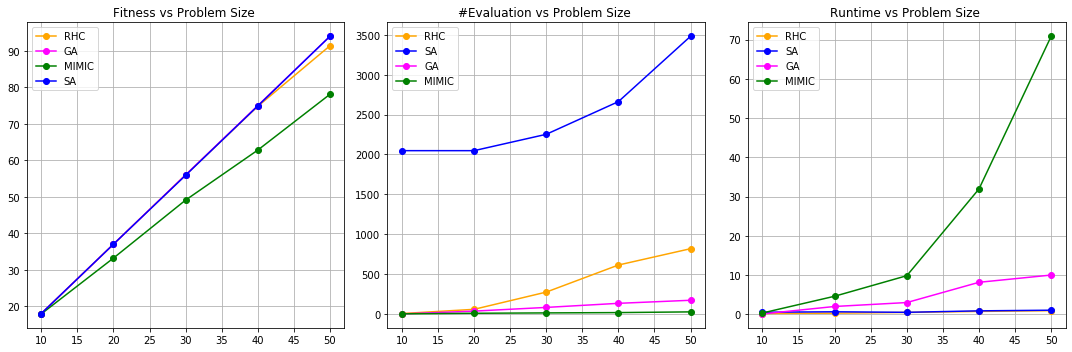

In [208]:
fitness = compare_all.pivot_table(values='Fitness', columns='algo',index='problem size').reset_index()
time_ = compare_all.pivot_table(values='Time', columns='algo',index='problem size').reset_index()
eval_ = compare_all.pivot_table(values='num_eval', columns='algo',index='problem size').reset_index()

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(fitness['problem size'], fitness['rhc'], label="RHC", marker="o", color='orange')
#ax[0].plot(fitness['problem size'], fitness['sa'], label="SA", marker="o", color='blue')
ax[0].plot(fitness['problem size'], fitness['ga'], label="GA", marker="o", color='magenta')
ax[0].plot(fitness['problem size'], fitness['mimic'], label="MIMIC", marker="o", color='green')
ax[0].plot(fitness['problem size'], fitness['sa'], label="SA", marker="o", color='blue')
ax[1].plot(eval_['problem size'], eval_['rhc'], label="RHC", marker="o", color='orange')
ax[1].plot(eval_['problem size'], eval_['sa'], label="SA", marker="o", color='blue')
ax[1].plot(eval_['problem size'], eval_['ga'], label="GA", marker="o", color='magenta')
ax[1].plot(eval_['problem size'], eval_['mimic'], label="MIMIC", marker="o", color='green')
ax[2].plot(time_['problem size'], time_['rhc'], label="RHC", marker="o", color='orange')
ax[2].plot(time_['problem size'], time_['sa'], label="SA", marker="o", color='blue')
ax[2].plot(time_['problem size'], time_['ga'], label="GA", marker="o", color='magenta')
ax[2].plot(time_['problem size'], time_['mimic'], label="MIMIC", marker="o", color='green')



ax[0].set_title("Fitness vs Problem Size ")
ax[1].set_title("#Evaluation vs Problem Size ")
ax[2].set_title("Runtime vs Problem Size ")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',
#            borderaxespad=0, frameon=False)
plt.tight_layout()
plt.savefig('cp_compare_all.png',dpi=200)
plt.show()

### End